In [1]:
import pandas
import datetime
import numpy
from scipy import signal, ndimage
from davitpy.models import *
from davitpy import utils
from davitpy.pydarn.plotting import *
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

In [2]:
selDT = datetime.datetime( 2012, 6, 18, 2, 45 )

In [3]:
inpTecFile = "../data/gps120618g.001.hdf5"
dataDF = pandas.read_hdf(inpTecFile, 'Data/Table Layout')
dataDF["date"] = pandas.to_datetime(dataDF["year"]*10000000000 +\
                                    dataDF["month"]*100000000 + dataDF["day"]*1000000 +\
                                    dataDF["hour"]*10000 + dataDF["min"]*100 +\
                                    dataDF["sec"],format='%Y%m%d%H%M%S')
# Only take selected datetime
dataDF["selTimeDel"] = dataDF["date"] - selDT
dataDF = dataDF[ dataDF["selTimeDel"] == min(abs(dataDF["selTimeDel"])) ].reset_index(drop=True)
# Discard bad tec values
dataDF = dataDF[ dataDF["tec"] <= 50. ]
dataDF.head()

year  month  day  hour  min  sec    ut1_unix    ut2_unix  recno  gdlat  \
0  2012      6   18     2   47   30  1339987500  1339987800     68  -90.0   
1  2012      6   18     2   47   30  1339987500  1339987800     68  -90.0   
2  2012      6   18     2   47   30  1339987500  1339987800     68  -90.0   
3  2012      6   18     2   47   30  1339987500  1339987800     68  -90.0   
4  2012      6   18     2   47   30  1339987500  1339987800     68  -90.0   

    glon  tec  dtec                date  selTimeDel  
0  149.0  1.9   2.6 2012-06-18 02:47:30    00:02:30  
1  152.0  1.9   2.6 2012-06-18 02:47:30    00:02:30  
2  155.0  1.4   2.6 2012-06-18 02:47:30    00:02:30  
3  157.0  1.1   2.6 2012-06-18 02:47:30    00:02:30  
4  159.0  1.0   2.6 2012-06-18 02:47:30    00:02:30

In [4]:
# medDF = dataDF[ [ "gdlat", "glon", "tec" ] ]
medDF = dataDF.pivot( index="gdlat", columns="glon", values="tec" )
test3 = ndimage.filters.median_filter( medDF.as_matrix(), size=(1,2) )

In [5]:
medDF.head()

glon   -180.0  -179.0  -178.0  -177.0  -176.0  -175.0  -174.0  -173.0  -172.0  \
gdlat                                                                           
-90.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-89.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     3.4     NaN   
-88.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-87.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-86.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

glon   -171.0   ...     170.0   171.0   172.0   173.0   174.0   175.0   176.0  \
gdlat           ...                                                             
-90.0     NaN   ...       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-89.0     3.5   ...       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-88.0     NaN   ...       3.6     NaN     NaN     NaN     NaN     NaN     NaN   
-87.0     NaN   ...       5.4     5.4     5.4     5.4     5.4     NaN     NaN   
-86.0     NaN   ...       NaN     NaN     NaN     NaN     NaN     NaN     NaN   

glon    177.0   178.0   179.0  
gdlat                          
-90.0     NaN     NaN     NaN  
-89.0     NaN     NaN     NaN  
-88.0     NaN     NaN     NaN  
-87.0     4.3     4.1     3.8  
-86.0     NaN     NaN     NaN  

[5 rows x 360 columns]

In [6]:
medDF[ medDF.columns ] = test3
medDF.head()

glon   -180.0  -179.0  -178.0  -177.0  -176.0  -175.0  -174.0  -173.0  -172.0  \
gdlat                                                                           
-90.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-89.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     3.4   
-88.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-87.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-86.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

glon   -171.0   ...     170.0   171.0   172.0   173.0   174.0   175.0   176.0  \
gdlat           ...                                                             
-90.0     NaN   ...       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-89.0     NaN   ...       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-88.0     NaN   ...       3.9     3.6     NaN     NaN     NaN     NaN     NaN   
-87.0     NaN   ...       5.4     5.4     5.4     5.4     5.4     5.4     NaN   
-86.0     NaN   ...       NaN     NaN     NaN     NaN     NaN     NaN     NaN   

glon    177.0   178.0   179.0  
gdlat                          
-90.0     NaN     NaN     NaN  
-89.0     NaN     NaN     NaN  
-88.0     NaN     NaN     NaN  
-87.0     NaN     4.3     4.1  
-86.0     NaN     NaN     NaN  

[5 rows x 360 columns]

In [7]:
medDF = medDF.unstack().reset_index()
medDF.columns = [ "glon", "gdlat", "med_tec" ]
# medDF = pandas.merge( medDF, dataDF, on=[ "glon", "gdlat" ] )
medDF.head()

glon  gdlat  med_tec
0 -180.0  -90.0      NaN
1 -180.0  -89.0      NaN
2 -180.0  -88.0      NaN
3 -180.0  -87.0      NaN
4 -180.0  -86.0      NaN

In [8]:
gLonArr = medDF["glon"].values
gdLatArr = medDF["gdlat"].values
mlon, mlat = utils.coord_conv( gLonArr, gdLatArr, \
                                 "geo", "mag", altitude=300., \
                                 date_time=selDT )
medDF["mlon"] = mlon
medDF["mlat"] = mlat
medDF["mlt"] = [ aacgm.mltFromYmdhms(selDT.year, \
                selDT.month,selDT.day, selDT.hour,\
                selDT.minute, selDT.second, x) for x in medDF["mlon"] ]
medDF["normMLT"] = [x-24 if x >= 12\
             else x for x in medDF['mlt']]
medDF.head()

glon  gdlat  med_tec       mlon       mlat        mlt   normMLT
0 -180.0  -90.0      NaN  18.472788 -74.917784  23.131213 -0.868787
1 -180.0  -89.0      NaN  15.508806 -75.451646  22.933614 -1.066386
2 -180.0  -88.0      NaN  12.294946 -75.948940  22.719357 -1.280643
3 -180.0  -87.0      NaN   8.823391 -76.403395  22.487920 -1.512080
4 -180.0  -86.0      NaN   5.092981 -76.808426  22.239226 -1.760774

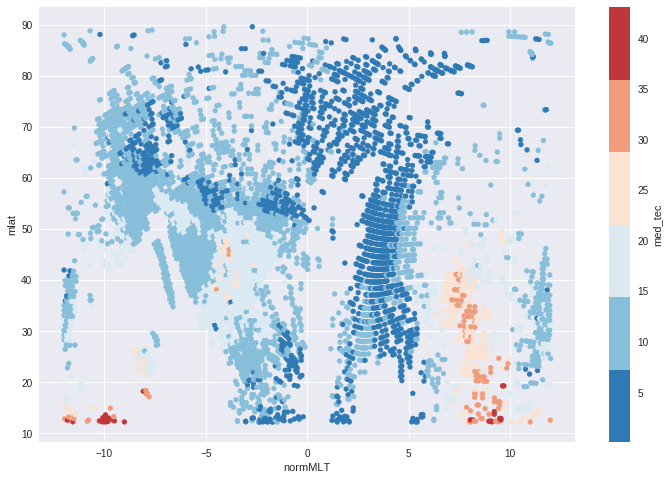

In [9]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
seaMap = ListedColormap(sns.color_palette("RdBu_r"))
medDF[medDF["mlat"] > 0.].plot( kind='scatter',
              x='normMLT',
              y='mlat',
              c='med_tec',
              s=25, cmap=seaMap, ax=ax)#, marker="s"

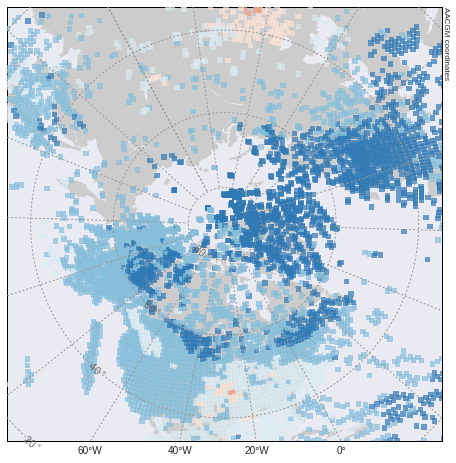

In [15]:
# Plot map
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
m1 = utils.plotUtils.mapObj(boundinglat=30., gridLabels=True, coords='mag', ax=ax, datetime=selDT)
xVec, yVec = m1(list(medDF["mlon"]), list(medDF["mlat"]), coords="mag")
m1.scatter( xVec, yVec , c=medDF["med_tec"], s=30.,\
           cmap=seaMap, alpha=0.7, zorder=5., edgecolor='none', marker="s" )
